# Visualizing generated molecules 

In [13]:
import random
from rdkit import Chem
from rdkit.Chem import Draw
from plot_utils import load_chid
from pathlib import Path
import matplotlib.pyplot as plt 
import cairosvg
import tempfile
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG

order = ('Split1', 'Split2', 'Split1_alt')

In [3]:
def save_svg(svg, filepath):
    """
    Save svg content in filepath

    :param str  svg:        SVG content
    :param str  filepath:   Path of the SVG file to save
    :return:
    """
    try:
        file_handle = open(filepath, 'w')
    except IOError as e:
        print(str(e))
        exit(1)

    file_handle.write(svg)
    file_handle.close() 

# 1. JAK2 revisited

In [4]:
results_dir = Path('results/new_datasets/')
chid = 'CHEMBL3888429'

### Graph GA

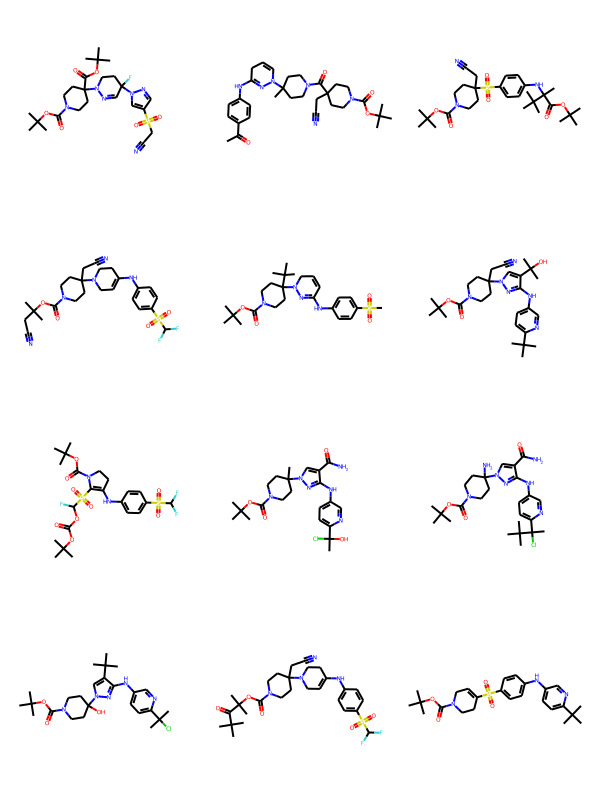

In [4]:
optimizer = 'graph_ga'
chid_path = results_dir/optimizer/chid
# split info contains information about the data splits. a list of dataframes
preds_internal, preds_external, auc, smiles, split_info = load_chid(Path(chid_path), order)

smiles_opt = []
for sl in smiles:
    smiles_opt.extend(sl[-1])
Draw.MolsToGridImage([Chem.MolFromSmiles(s) for s in random.sample(smiles_opt, 12)])

### LSTM HC

In [73]:
optimizer = 'lstm_hc'
chid_path = results_dir/optimizer/chid
# split info contains information about the data splits. a list of dataframes
preds_internal, preds_external, auc, smiles, split_info = load_chid(Path(chid_path), order)
from rdkit.Chem import Draw

smiles_opt = []
for sl in smiles:
    smiles_opt.extend(sl[-1])

molsPerRow=3
nRows = len(smiles_opt) // molsPerRow
if len(smiles_opt) % molsPerRow:
    nRows += 1
    
subImgSize=(200, 200)
fullSize = (molsPerRow * subImgSize[0], nRows * subImgSize[1])
d2d = rdMolDraw2D.MolDraw2DSVG(fullSize[0], fullSize[1], subImgSize[0], subImgSize[1])
d2d.drawOptions().prepareMolsBeforeDrawing=False
DrawingOptions.atomLabelFontSize = 20
DrawingOptions.dotsPerAngstrom = 100
DrawingOptions.bondLineWidth = 0.5
d2d.DrawMolecules(list([Chem.MolFromSmiles(s) for s in random.sample(smiles_opt, 12)]))
d2d.FinishDrawing()
svg_text = d2d.GetDrawingText()
with tempfile.NamedTemporaryFile(delete=True) as tmp:
    tmp.write(svg_text.encode())
    tmp.flush()
    cairosvg.svg2pdf(url=tmp.name, write_to="mol_img.pdf")
    
#Draw.MolsToGridImage([Chem.MolFromSmiles(s) for s in random.sample(smiles_opt, 9)], subImgSize=(300, 300), useSVG=True)
plt.savefig("test.svg", format="svg")
from cairosvg import svg2png



#svg2png(bytestring=svg.data,write_to='output.png')
#Draw.MolsToImage([Chem.MolFromSmiles(s) for s in random.sample(smiles_opt, 12)], subImgSize=(350, 350))
#svg_text = svg.GetDrawingText()

<Figure size 432x288 with 0 Axes>

In [75]:
from PyPDF2 import PdfFileWriter,PdfFileReader,PdfFileMerger

pdf_file = PdfFileReader(open("mol_img.pdf","rb"))
page = pdf_file.getPage(0)
print(page.cropBox.getLowerLeft())
print(page.cropBox.getLowerRight())
print(page.cropBox.getUpperLeft())
print(page.cropBox.getUpperRight())

(0, 0)
(450, 0)
(0, 311550)
(450, 311550)


In [82]:
from PyPDF2 import PdfFileWriter, PdfFileReader

output = PdfFileWriter() 
input = PdfFileReader(open('mol_img.pdf', 'rb')) 

n = input.getNumPages()

for i in range(n):
    page = input.getPage(i)
    page.cropBox.lowerLeft = (0, 310700)
    page.cropBox.lowerRight = (450, 310700)
    output.addPage(page) 

outputStream = open('result.pdf','wb') 
output.write(outputStream) 
outputStream.close() 

In [71]:
svg2png(url='test.svg', write_to= "output.png")


In [52]:
molsPerRow=3
nRows = len(smiles_opt) // molsPerRow
if len(smiles_opt) % molsPerRow:
    nRows += 1
    
subImgSize=(200, 200)
fullSize = (molsPerRow * subImgSize[0], nRows * subImgSize[1])
d2d = rdMolDraw2D.MolDraw2DSVG(fullSize[0], fullSize[1], subImgSize[0], subImgSize[1])
d2d.drawOptions().prepareMolsBeforeDrawing=False
DrawingOptions.atomLabelFontSize = 20
DrawingOptions.dotsPerAngstrom = 100
DrawingOptions.bondLineWidth = 0.5
d2d.DrawMolecules(list([Chem.MolFromSmiles(s) for s in random.sample(smiles_opt, 12)]))
d2d.FinishDrawing()
# save to png file
plt.savefig("Graph.pdf")
svg_text = d2d.GetDrawingText()
with tempfile.NamedTemporaryFile(delete=True) as tmp:
    tmp.write(svg_text.encode())
    tmp.flush()
    cairosvg.svg2png(url=tmp.name, write_to="./mol_img.png")

CairoError: cairo returned CAIRO_STATUS_INVALID_SIZE: b'invalid value (typically too big) for the size of the input (surface, pattern, etc.)'

<Figure size 432x288 with 0 Axes>

### MSO

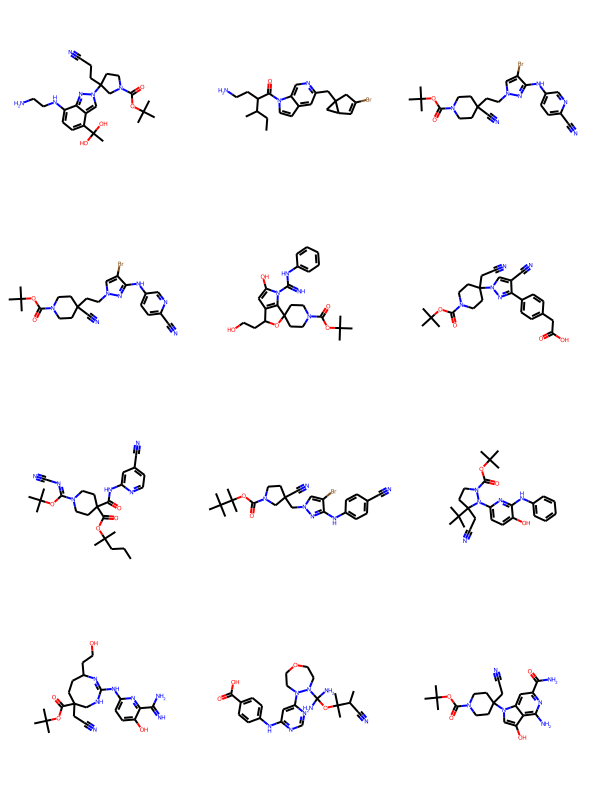

In [6]:
optimizer = 'mso'
chid_path = results_dir/optimizer/chid
# split info contains information about the data splits. a list of dataframes
preds_internal, preds_external, auc, smiles, split_info = load_chid(Path(chid_path), order)

smiles_opt = []
for sl in smiles:
    smiles_opt.extend(sl[-1])
Draw.MolsToGridImage([Chem.MolFromSmiles(s) for s in random.sample(smiles_opt, 12)])

# 2. ALDH1

In [7]:
results_dir = Path('results/new_datasets/')
chid = 'ALDH1'

### Graph GA

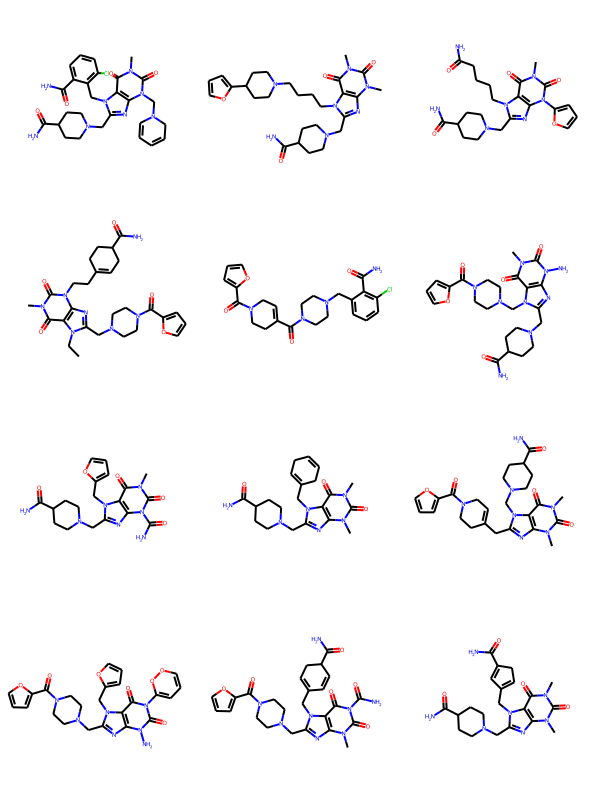

In [8]:
optimizer = 'graph_ga'
chid_path = results_dir/optimizer/chid
# split info contains information about the data splits. a list of dataframes
preds_internal, preds_external, auc, smiles, split_info = load_chid(Path(chid_path), order)

smiles_opt = []
for sl in smiles:
    smiles_opt.extend(sl[-1])
Draw.MolsToGridImage([Chem.MolFromSmiles(s) for s in random.sample(smiles_opt, 12)])

### LSTM HC

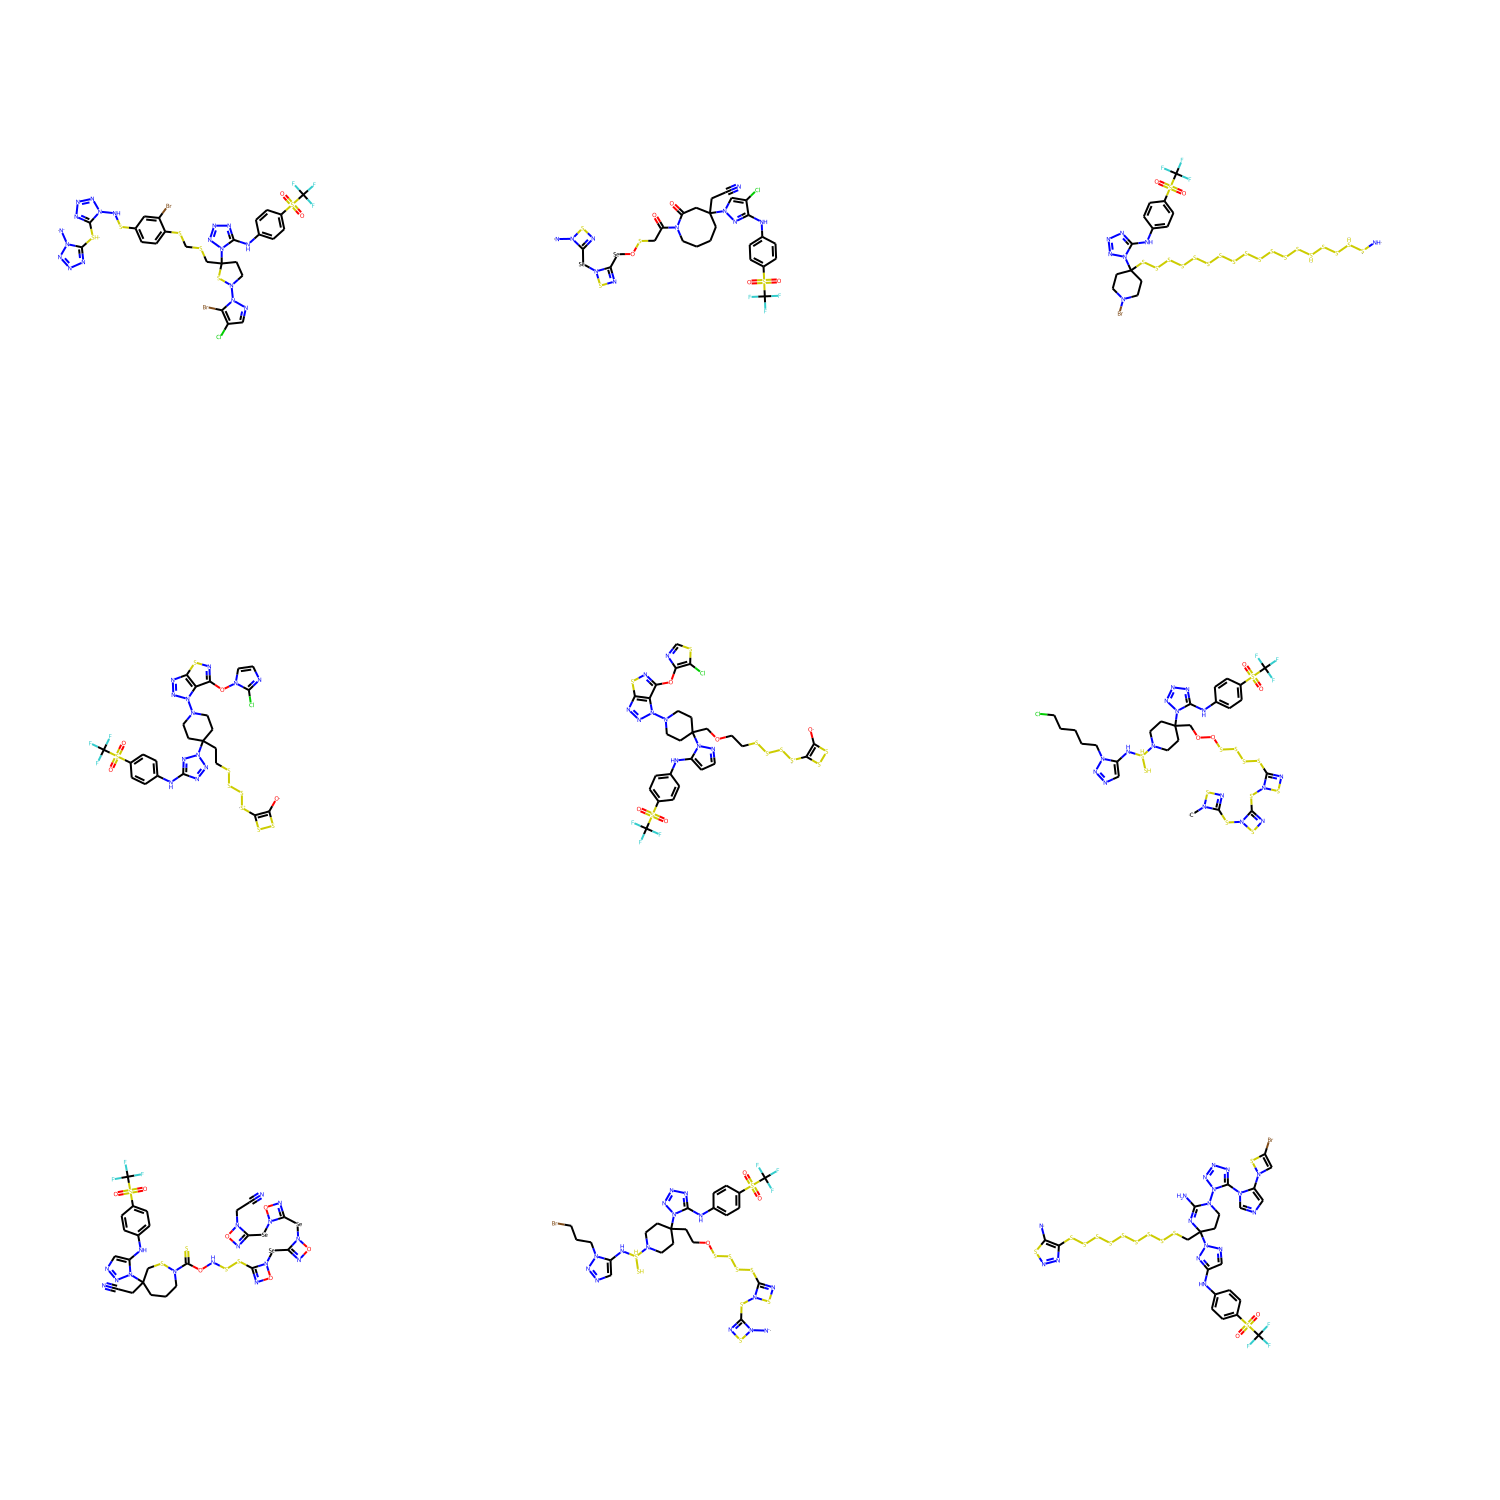

In [55]:
optimizer = 'lstm_hc'
chid_path = results_dir/optimizer/chid
# split info contains information about the data splits. a list of dataframes
preds_internal, preds_external, auc, smiles, split_info = load_chid(Path(chid_path), order)

smiles_opt = []
for sl in smiles:
    smiles_opt.extend(sl[-1])
Draw.MolsToGridImage([Chem.MolFromSmiles(s) for s in random.sample(smiles_opt, 9)], subImgSize=(500, 500))

### MSO

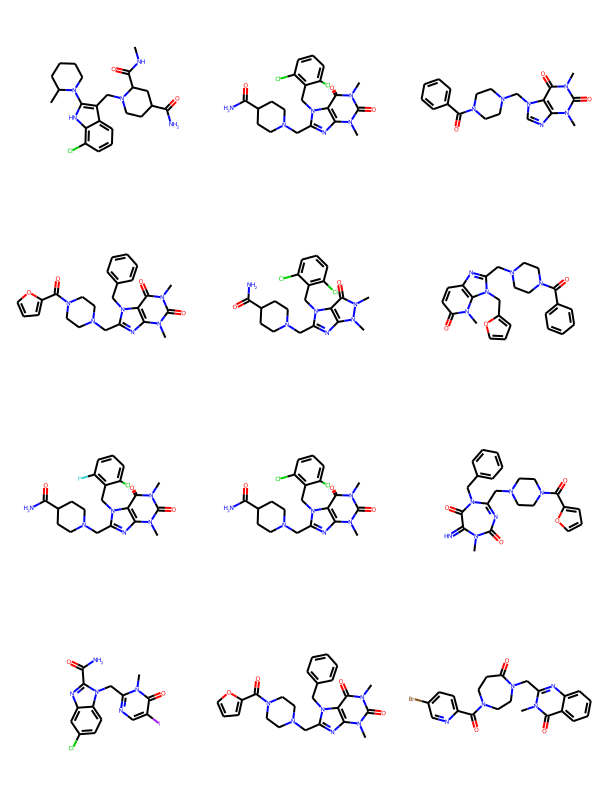

In [10]:
optimizer = 'mso'
chid_path = results_dir/optimizer/chid
# split info contains information about the data splits. a list of dataframes
preds_internal, preds_external, auc, smiles, split_info = load_chid(Path(chid_path), order)

smiles_opt = []
for sl in smiles:
    smiles_opt.extend(sl[-1])
Draw.MolsToGridImage([Chem.MolFromSmiles(s) for s in random.sample(smiles_opt, 12)])